# Intuit Quickbooks Upgrade

* Team-lead GitLab userid: 243
* Group name: Korinna
* Team member names: Siqi Chen, Wen-Hsuan Hung, Xinyu Lou, Yuefeng Mao

## Setup

Please complete this python notebook with your group by answering the questions in `intuit-redux.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the second group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes from the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - model1.ipynb, model2.ipynb, model3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc, make_scorer
import seaborn as sns
from IPython.display import Image
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [2]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = (intuit75k["res1"] == "Yes").astype(int)
intuit75k.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [3]:
# show dataset description
rsm.describe(intuit75k)

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample


In [4]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

      index     OR     OR%   2.5%  97.5% p.values     
1   numords  1.352   35.2%  1.313  1.392   < .001  ***
2  version1  2.113  111.3%  1.911  2.335   < .001  ***
3  upgraded  2.628  162.8%  2.388  2.894   < .001  ***


In [5]:
# importing functions from a module/package
from utils import functions
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [6]:
pd.options.mode.chained_assignment = None

In [7]:
## Question answers
# Standardization
intuit75k_std = intuit75k.copy()
intuit75k_std["sex"] = rsm.ifelse(intuit75k.sex == "Male", 0, rsm.ifelse(intuit75k.sex == "Female", 1, 0.5))
intuit75k_std['zip_bins'] =  intuit75k_std.zip_bins.astype('category')
intuit75k_std['bizflag'] =  intuit75k_std.bizflag.astype('category')
intuit75k_std['version1'] =  intuit75k_std.version1.astype('category')
intuit75k_std['owntaxprod'] =  intuit75k_std.owntaxprod.astype('category')
intuit75k_std['upgraded'] =  intuit75k_std.upgraded.astype('category')

to_std = intuit75k_std.columns[[pd.api.types.is_numeric_dtype(intuit75k[col]) for col in intuit75k_std.columns]]
to_std = rsm.setdiff(to_std, "training") 
to_std = rsm.setdiff(to_std, "res1_yes") 
to_std = rsm.setdiff(to_std, "sex")
to_std = rsm.setdiff(to_std, "id")

intuit75k_std[to_std] = rsm.scale_df(intuit75k_std[to_std], sf=1, train=intuit75k_std.training == 1)

In [8]:
intuit75k_std_train = intuit75k_std[intuit75k_std["training"] == 1]
intuit75k_std_test = intuit75k_std[intuit75k_std["training"] == 0]

In [9]:
X_train = intuit75k_std_train.loc[:,"zip_bins":"upgraded"]
X_test = intuit75k_std_test.loc[:,"zip_bins":"upgraded"]
y_train = intuit75k_std_train["res1_yes"]
y_test = intuit75k_std_test["res1_yes"]

In [10]:
cost = 1.41
margin = 60
breakeven = cost/margin

In [11]:
def wave1_calc(dat=intuit75k_std_test, mailto="mailto_iq",perf="res1_yes",lev=1,intro=""):
    nr_sms = sum(dat[mailto] == True)
    sms_cost = nr_sms * cost
    response_rate = len(dat[(dat[perf] == lev) & (dat[mailto] == lev)]) / sum(dat[mailto] == lev)
    nr_responses = response_rate * nr_sms
    revenue = margin * nr_responses
    profit = revenue - sms_cost
    ROME = profit / sms_cost
    
    TP = sum([(p and l) for (p,l) in zip(dat[mailto], dat[perf])])
    FP = sum([(p and 1-l) for (p,l) in zip(dat[mailto], dat[perf])])
    TN = sum([(1-p and 1-l) for (p,l) in zip(dat[mailto], dat[perf])])
    FN = sum([(1-p and l) for (p,l) in zip(dat[mailto], dat[perf])])
    acc = (TP+TN) / (TP+FP+TN+FN)
    AUC = roc_auc_score(dat[perf], dat[mailto])

    print(intro)
    print('Total number of mails that would be sent out ' + str(nr_sms))
    print('Total cost: ' + (str(round(sms_cost,2))))
    print('Total number of positive responses: ' + str(nr_responses))
    print('Response rate: ' + str((round(response_rate,2))))
    print('Total revenue: ' + str(revenue))
    print('Return on Marketing Expenditures expressed as a proportion: ' + str(round(ROME,2)))
    print('Total profit: ' + str(round(profit,2)))
    print('The accuracy of the model: ' + str(round(acc,4)))
    print('The AUC of the model: ' + str(round(AUC,4)))
    
    # df= pd.DataFrame({"profit":[profit],"ROME":[ROME],"accuracy":[acc]})
    
    return profit, ROME, acc, AUC

In [12]:
# define a profit score to be used in gridsearch
def calc_profit_func(y_true, y_pred, **kwargs):
    y_pred = np.array(y_pred>breakeven)
    nr_sms = sum(y_pred)
    sms_cost = nr_sms * cost
    response_rate = sum(np.multiply(y_true,y_pred)) / sum(y_pred)
    nr_responses = response_rate * nr_sms
    revenue = margin * nr_responses
    profit = revenue - sms_cost
    ROME = profit / sms_cost
    return profit

intuit_profit = make_scorer(calc_profit_func, greater_is_better=True, needs_proba=True)

### Neural Network

In [13]:
best_model = MLPClassifier(solver='lbfgs',random_state=1,alpha=0.001,hidden_layer_sizes=(8,8),learning_rate_init=0.5,max_iter=195).fit(X_train , y_train)
# Evaluate test set 
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

intuit75k_std_test["mailto_NN_proba"] = best_model.predict_proba(X_test)[:, 1]
intuit75k_std_test["mailto_NN"] = intuit75k_std_test.mailto_NN_proba>breakeven

Test set accuracy of best model: 0.951


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [14]:
profit_nn, ROME_nn, acc_nn ,AUC_nn = wave1_calc(dat=intuit75k_std_test, mailto="mailto_NN",perf="res1_yes",lev=1,intro="With Neural network model")

With Neural network model
Total number of mails that would be sent out 13427
Total cost: 18932.07
Total number of positive responses: 947.0000000000001
Response rate: 0.07
Total revenue: 56820.00000000001
Return on Marketing Expenditures expressed as a proportion: 2.0
Total profit: 37887.93
The accuracy of the model: 0.4384
The AUC of the model: 0.6377


### Decision Tree

In [15]:
dt_model = DecisionTreeClassifier(max_depth = 445, min_samples_leaf = 1, min_samples_split = 0.09999999999999999, max_features = 7).fit(X_train, y_train)
intuit75k_std_test['mailto_dt_prob'] = dt_model.predict_proba(X_test)[:,1]
intuit75k_std_test['mailto_dt'] = rsm.ifelse(intuit75k_std_test['mailto_dt_prob'] > breakeven, 1, 0)

In [16]:
profit_dt, ROME_dt, acc_dt ,AUC_dt = wave1_calc(dat = intuit75k_std_test, mailto = 'mailto_dt',intro="With Dicision Tree model")

With Dicision Tree model
Total number of mails that would be sent out 15015
Total cost: 21171.15
Total number of positive responses: 974.0
Response rate: 0.06
Total revenue: 58440.0
Return on Marketing Expenditures expressed as a proportion: 1.76
Total profit: 37268.85
The accuracy of the model: 0.3702
The AUC of the model: 0.6134


### Boosting

In [17]:
gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=30).fit(X_train,y_train)

In [18]:
intuit75k_std_test['mailto_gb_prob'] = gb.predict_proba(X_test)[:,1]
intuit75k_std_test['mailto_gb'] = rsm.ifelse(intuit75k_std_test['mailto_gb_prob'] > breakeven, 1, 0)

In [19]:
profit_gb, ROME_gb, acc_gb ,AUC_gb = wave1_calc(dat=intuit75k_std_test, mailto="mailto_gb",perf="res1_yes", lev=1, intro="With Gradient Boosting")

With Gradient Boosting
Total number of mails that would be sent out 13150
Total cost: 18541.5
Total number of positive responses: 942.0
Response rate: 0.07
Total revenue: 56520.0
Return on Marketing Expenditures expressed as a proportion: 2.05
Total profit: 37978.5
The accuracy of the model: 0.4503
The AUC of the model: 0.6417


### Random Forest

In [20]:
rf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators=42)
rf.fit(X_train, y_train)    
intuit75k_std_test['mailto_rf_prob'] = rf.predict_proba(X_test)[:,1]
intuit75k_std_test['mailto_rf'] = rsm.ifelse(intuit75k_std_test['mailto_rf_prob'] > breakeven, 1, 0)
profit_rf, ROME_rf, acc_rf ,AUC_rf = wave1_calc(dat=intuit75k_std_test, mailto="mailto_rf",perf="res1_yes",lev=1,intro="With Random Forest")

With Random Forest
Total number of mails that would be sent out 13679
Total cost: 19287.39
Total number of positive responses: 948.0
Response rate: 0.07
Total revenue: 56880.0
Return on Marketing Expenditures expressed as a proportion: 1.95
Total profit: 37592.61
The accuracy of the model: 0.4273
The AUC of the model: 0.6322


### Model comparison

In [21]:
mod_wave1_comparison = pd.DataFrame(
    {
        "model": [
            "Neural Network",
            "Decision Tree",
            "Random Forest",
            "Gradient Boosting",
        ],
        "profit": [profit_nn, profit_dt, profit_rf, profit_gb],
        "ROME": [ROME_nn, ROME_dt, ROME_rf, ROME_gb],
        "Accuracy": [acc_nn, acc_dt, acc_rf, acc_gb],
        "AUC":[AUC_nn, AUC_dt, AUC_rf, AUC_gb]
    }
)
mod_wave1_comparison

,model,profit,ROME,Accuracy,AUC
0,Neural Network,37887.93,2.001257,0.438400,0.637654
1,Decision Tree,37268.85,1.760360,0.370222,0.613416
2,Random Forest,37592.61,1.949077,0.427289,0.632242
3,Gradient Boosting,37978.50,2.048297,0.450267,0.641744


In [22]:
mod_wave1_plot = pd.DataFrame(
    {
        "res1": intuit75k_std_test["res1"],
        "Neural Network":intuit75k_std_test["mailto_NN_proba"],
        "Decision Tree":intuit75k_std_test["mailto_dt_prob"],
        "Random Forest": intuit75k_std_test["mailto_rf_prob"],
        "Gradient Boosting": intuit75k_std_test["mailto_gb_prob"]
    }
)

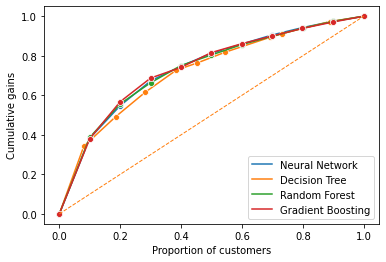

In [23]:
fig = rsm.gains_plot(mod_wave1_plot,"res1","Yes",["Neural Network","Decision Tree","Random Forest","Gradient Boosting"])
fig = fig.legend(title=None)

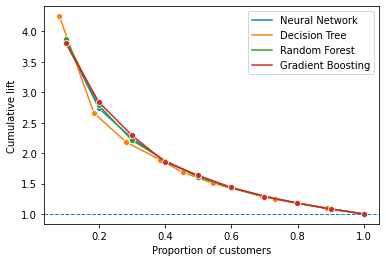

In [24]:
fig = rsm.lift_plot(mod_wave1_plot,"res1","Yes",["Neural Network","Decision Tree","Random Forest","Gradient Boosting"])
fig = fig.legend(title=None)

### Targeting for wave 2 using Gradient Boosting model

In [25]:
intuit75k_std_test["mailto_gb_wav2"] = np.where(intuit75k_std_test['mailto_gb_prob']*0.5 >= breakeven, 1, 0)

In [26]:
# If customers in test have already responsed wave_1, we should not mail them wave 2
intuit75k_std_test["final_target"] = intuit75k_std_test["mailto_gb_wav2"]
for i in range(0,len(intuit75k_std_test["final_target"])):
    if intuit75k_std_test['res1_yes'].iloc[i] == 1:
        intuit75k_std_test["final_target"].iloc[i] = 0
Final_target_number = intuit75k_std_test["final_target"].sum()
print("Among test customers(22500), we want to target", Final_target_number,"customers in wave 2.")

Among test customers(22500), we want to target 5792 customers in wave 2.


In [27]:
# Output target labels for test customers
output_df = intuit75k_std_test[["id","final_target"]]
output_df = output_df.rename(columns={"final_target":"mailto_wave2"})
output_df["mailto_wave2"] =  output_df.mailto_wave2.astype('bool')
output_df= output_df.set_index("id")
output_df.to_csv("Siqi_Xinyu_Yuefeng_Wenhsuan_Korinna.csv")